In [1]:
from ipyaladin import Aladin
from sidecar import Sidecar

In [3]:
aladin = Aladin()
with Sidecar(title="aladin_output"):
    display(aladin)

In [8]:
aladin.target = "M1"

In [9]:
from astropy.coordinates import SkyCoord

In [11]:
coo_perseus = SkyCoord.from_name("Perseus Cluster")

In [12]:
aladin.target = coo_perseus

In [14]:
import astropy.units as u
from astropy.coordinates import Angle

In [15]:
aladin.fov = Angle(15 * u.arcmin)

In [20]:
estimated_dimension = aladin.fov
estimated_dimension

/Users/brian.merino/opt/anaconda3/envs/aladin_adass/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2605: RuntimeWarning: invalid value encountered in do_format (vectorized)
  outputs = ufunc(*inputs)


<Angle 1.04596 deg>

In [21]:
from regions import CircleSkyRegion

In [22]:
aladin.add_graphic_overlay_from_region(
    CircleSkyRegion(coo_perseus, estimated_dimension),
    color='salmon', line_dash=[5],
    name='cluster_dimension'
)

In [23]:
aladin.add_fits("chandra_fQoZFZw.fits",name="chandra")

In [4]:
from mocpy import MOC

In [5]:
gaia_galcon_coverage = MOC.from_vizier_table(
    "I/356/galcand"
)

In [6]:
aladin.add_moc(gaia_galcon_coverage,
               color='seagreen',
               name='gaia_galcan')

In [24]:
from astroquery.mocserver import MOCServer

In [25]:
euclid = MOCServer.find_datasets(meta_data="*Euclid*")
euclid["ID"]

CDS/P/Euclid/ERO/FirstImages
CDS/P/Euclid/ERO/NISP.H
CDS/P/Euclid/ERO/NISP.J
CDS/P/Euclid/ERO/NISP.Y
CDS/P/Euclid/ERO/VIS
CDS/P/Euclid/ERO/color


In [26]:
aladin.survey = "CDS/P/Euclid/ERO/VIS"

In [27]:
euclid_cutout = aladin.get_view_as_fits()[0]

In [28]:
import matplotlib.pyplot as plt
import numpy as np

/var/folders/87/9twv71lj5qz7pcn91qbrxl_00000gp/T/ipykernel_81553/2722177904.py:1: RuntimeWarning: invalid value encountered in cast
  plt.imshow(np.flipud(euclid_cutout.data.astype("short")),


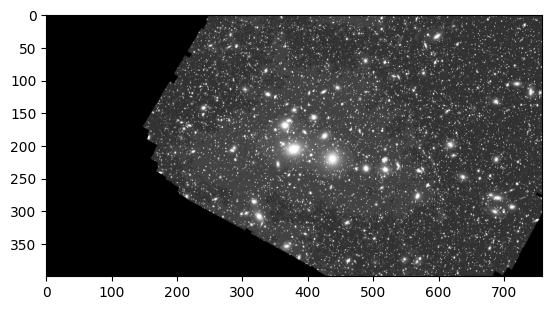

In [31]:
plt.imshow(np.flipud(euclid_cutout.data.astype("short")),
           cmap="Greys_r", norm='asinh', vmin=10, vmax=50)

In [32]:
from astroquery.vizier import Vizier

In [33]:
catalog = Vizier(catalog="I/356/galcand", row_limit=-1)
extra_galactic = catalog.query_region(
    coo_perseus,
    radius=estimated_dimension
)[0]
extra_galactic

/Users/brian.merino/Desktop/Aladin_2/ADASS/.adass-ipyaladin/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2605: RuntimeWarning: invalid value encountered in do_format (vectorized)
  outputs = ufunc(*inputs)


Source,SolID,Class,PGal,PQSO,z,RA_ICRS,DE_ICRS,_RA.icrs,_DE.icrs
,,,,,,deg,deg,deg,deg
int64,int64,str15,float64,float64,float64,float64,float64,float64,float64
239401309576981248,1636148068921376768,,1,0,--,49.94493455864,41.27038065247,49.94493455864,41.27038065247
239401515737357696,1636148068921376768,,1,3.616461e-14,0.0668034,49.93560822275,41.27807383988,49.93560822275,41.27807383988
239401721896535552,1636148068921376768,,1,6.73415e-15,0.0707636,49.97071535744,41.30236864072,49.97071535744,41.30236864072
239401721896567936,1636148068921376768,GALAXY,0.00239435,0,--,49.95789092325,41.29708697143,49.95789092325,41.29708697143
239402271652354048,1636148068921376768,GALAXY,1,0,--,49.88319625528,41.30423094068,49.88319625528,41.30423094068
239402718328946688,1636148068921376768,,1,0,0.0708225,49.91749437713,41.32919128144,49.91749437713,41.32919128144
239404401956160512,1636148068921376768,,1,0,--,50.05526862059,41.28686652342,50.05526862059,41.28686652342
239405192229314304,1636148068921376768,GALAXY,1,0,0.0515022,50.07244864276,41.34891708129,50.07244864276,41.34891708129


In [40]:
aladin.add_table(
    extra_galactic[extra_galactic["Class"]
    == "GALAXY"],
    shape='circle',
    source_size=15,
    color='lightblue',
    name='galaxies')

In [41]:
aladin.add_table(
    extra_galactic[extra_galactic["Class"]
    != "GALAXY"],
    shape='circle',
    source_size=15,
    color='pink',
    name='galaxies')

In [44]:
len(aladin.selected_objects)

2

In [45]:
aladin.selected_objects[1]

Source,SolID,Class,PGal,PQSO,z,RA_ICRS,DE_ICRS,_RA.icrs,_DE.icrs
str18,str19,str1,str14,str14,str13,str15,str15,str15,str15
239411170823933952,1636148068921376768,,0.003130826,0,,50.05818931047,41.51446266953,50.05818931047,41.51446266953
239411273903832704,1636148068921376768,,1,0,,50.04057651504,41.51817869061,50.04057651504,41.51817869061
239411342622717184,1636148068921376768,,0.002154991,0.0001272224,,50.03583656545,41.52045448170,50.03583656545,41.52045448170
239421925421812736,1636148068921376768,,1,0,,49.96862044946,41.54981088004,49.96862044946,41.54981088004
239423368530814080,1636148068921376768,,1,1.758141e-15,0.0703881,50.00366770060,41.55377354303,50.00366770060,41.55377354303
239423402891413120,1636148068921376768,,1,0,0.0708228,49.97554603964,41.56340933124,49.97554603964,41.56340933124
239424158805035776,1636148068921376768,,1,2.404508e-15,0.0708228,49.96452625336,41.57358049128,49.96452625336,41.57358049128
239435153921308160,1636148068921376768,,1,0,0.0708226,50.13742646280,41.57412784913,50.13742646280,41.57412784913
